In [1]:
import torch
DATA = 'MNIST'
prefix = 'mnist_bnn_'
traing = True
epochs = 200
batch_size = 64
leaks_loss = None
print(torch.cuda.get_device_name(0))

Tesla P100-PCIE-16GB


In [2]:
import os
from google.colab import drive

drive.mount('/content/gdrive')
root_path = '/content/gdrive/MyDrive/Colab Notebooks/BinarizeLocalize/'

Mounted at /content/gdrive


In [3]:
pip install import-ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=14a1594305c42b2b493df9fe1e578d16ec086a5648ecf02a1249b1a697791e0e
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [14]:
import import_ipynb
os.chdir(root_path + 'library')
Call_Template = True
%run Template.ipynb

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##Fetching the dataset and preparing train, validation and test data loaders

In [5]:
(trainSet, validSet, checkSet, testSet,
 trainSetGPU, validSetGPU, checkSetGPU) = load_data_to_gpu()
print(len(trainSet), len(validSet), len(checkSet), len(testSet))


60000 7000 3000 10000


##Visualising the data

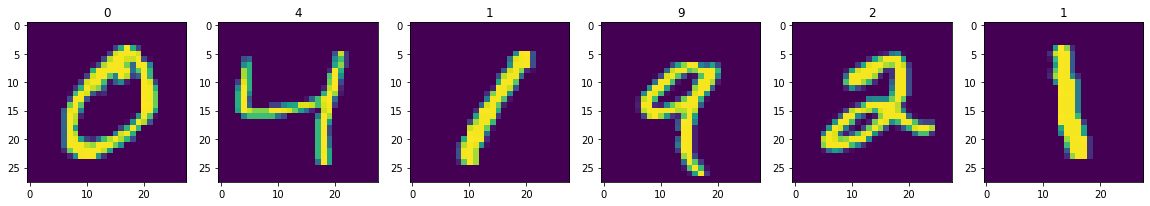

In [6]:
plot_samples(trainSet, None)

In [7]:
class Network(Model):
    def __init__(self):
        super(Network, self).__init__()
        # at client
        self.feature0 = nn.Sequential(
            BinaryConv2d(1, 6, 3, 1, 1), #28
            nn.BatchNorm2d(6),
            BinaryTanh(),
        )
        self.feature1 = nn.Sequential(
            nn.MaxPool2d(2), #14
            #nn.Dropout(0.1),
        )
        # at server
        self.feature2 = nn.Sequential(
            BinaryConv2d(6, 16, 5, 1, 0), #10
            nn.BatchNorm2d(16),
            BinaryTanh(),
            nn.MaxPool2d(2), #5
            #nn.Dropout(0.2),
        )
        self.classifier = nn.Sequential(
            BinaryLinear(25 * 16, 120),
            nn.BatchNorm1d(120),
            BinaryTanh(),
            #nn.Dropout(0.3),
            BinaryLinear(120, 84),
            nn.BatchNorm1d(84),
            BinaryTanh(),
            #nn.Dropout(0.2),
            BinaryLinear(84, 10)
        )

##Defining model object, loss function and optimiser

In [8]:
(model, criterion, dataleaks, optimizer) = init_training(Network())

##Training and Validation

In [9]:
(trainLoss, validLoss, leaksLoss, accuracyList) = train_model(2)

Saving the model state dictionary for Epoch: 1 with Validation loss: 1.25607896 and Accuracy: 86.36%
Saving the model state dictionary for Epoch: 2 with Validation loss: 1.02245843 and Accuracy: 89.16%
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.73696280 and Accuracy: 91.96%
Saving the model state dictionary for Epoch: 8 with Validation loss: 0.64517289 and Accuracy: 93.34%
Saving the model state dictionary for Epoch: 16 with Validation loss: 0.60758710 and Accuracy: 93.37%
Saving the model state dictionary for Epoch: 17 with Validation loss: 0.52779800 and Accuracy: 93.66%
Saving the model state dictionary for Epoch: 18 with Validation loss: 0.48745859 and Accuracy: 94.84%
Saving the model state dictionary for Epoch: 19 with Validation loss: 0.47910604 and Accuracy: 94.40%
Saving the model state dictionary for Epoch: 24 with Validation loss: 0.45495486 and Accuracy: 94.59%
Saving the model state dictionary for Epoch: 25 with Validation loss: 0.36220500 and A

In [10]:
(model, trainLoss, validLoss, leaksLoss, accuracyList) = save_and_load()

Max accuracy is tensor(0.9766, device='cuda:0')


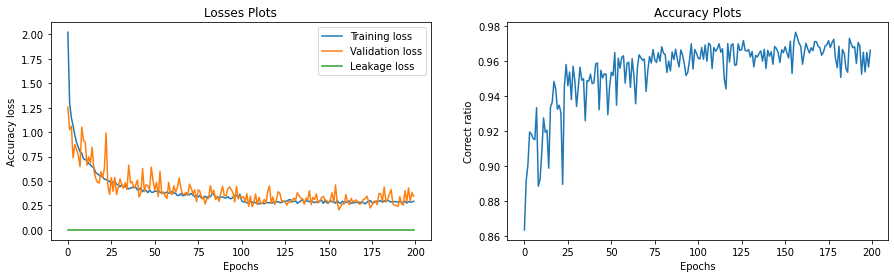

In [11]:
plot_losses()


Test accuracy: 0.972


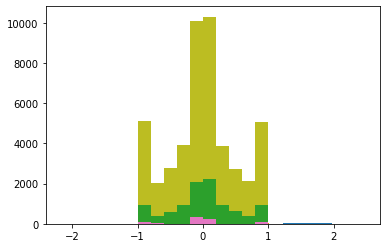

In [12]:
test_model()

##Measuring Privacy Preserving

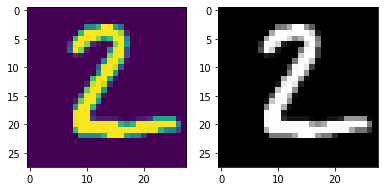

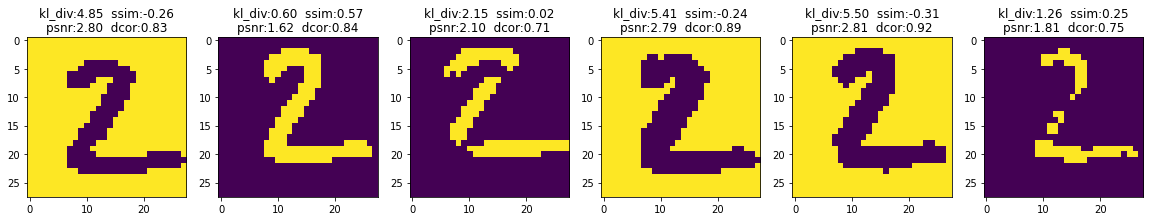

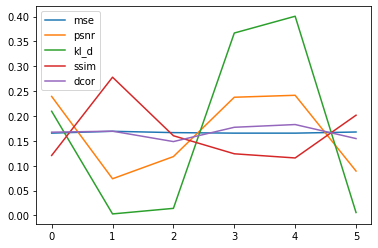

In [15]:
plot_measure(measure_image(testSet[1][0]))